# Predicting IBM Employee Attrition Python Jupyter Notebook

## Part 4 - Build a Decision Tree Model

** Import numpy and pandas. **

In [1]:
import numpy as np
import pandas as pd

** Import data visualization libraries and set %matplotlib inline. **

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

** Import churn modeling pickle file into a Pandas dataframe called churn_model2. **

In [3]:
churn_model2 = pd.read_pickle('../data/churn_modeling_data.pickle')

** Define X and y to split data into training and test data sets, and construct decision tree model. **

In [4]:
X = churn_model2.drop(['Churn'], axis=1)
y = churn_model2['Churn']

** Tune decision tree model to avoid overfitting. **

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import cross_val_score

C:\Users\kyrma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
max_depth_range1 = range(1, 11)

acc_scores3 = []

for depth in max_depth_range1:
    treereg = DecisionTreeClassifier(max_depth=depth, random_state=123)
    scores3 = cross_val_score(treereg, X, y, cv=14, scoring='accuracy')
    acc_scores3.append(scores3.mean().round(3))
    
print(acc_scores3)

[0.839, 0.846, 0.843, 0.831, 0.839, 0.833, 0.84, 0.835, 0.825, 0.812]


Text(0,0.5,'Decision Tree Accuracy Score')

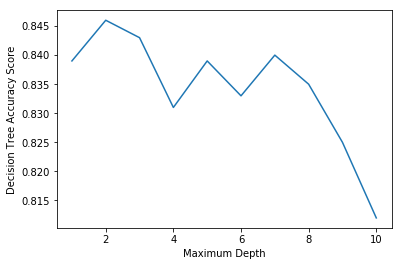

In [7]:
plt.plot(max_depth_range1, acc_scores3)
plt.xlabel('Maximum Depth')
plt.ylabel('Decision Tree Accuracy Score')

* The maximum depth of the decision tree should be 2 since the tree has the maximum accuracy score of 0.846.

** Decide which random state seed number will produce the highest accuracy score for a decision tree with a maximum depth of 2. **

In [8]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [9]:
seed_range2 = range(20, 31)

acc_scores4 = []

for seed in seed_range2:
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed)
    treereg = DecisionTreeClassifier(max_depth=2, random_state=123)
    treereg.fit(X_train, y_train)
    y_pred = treereg.predict(X_test)
    acc_scores4.append(metrics.accuracy_score(y_test, y_pred).round(3))

Text(0,0.5,'Accuracy Score for Decision Tree with Maximum Depth of 2')

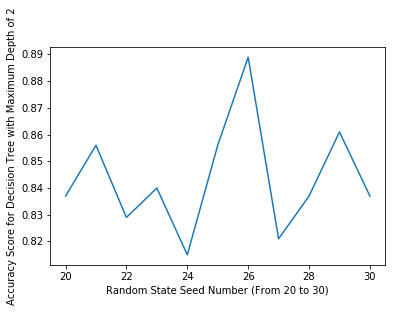

In [10]:
plt.plot(seed_range2, acc_scores4)
plt.xlabel('Random State Seed Number (From 20 to 30)')
plt.ylabel('Accuracy Score for Decision Tree with Maximum Depth of 2')

* 26 is the random state seed number that will produce the highest accuracy score for the decision tree with a maximum depth of 2.

** Split churn / attrition modeling data into training and test sets. **

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=26)

In [12]:
print(churn_model2.shape)
print(X_train.shape)
print(X_test.shape)

(1470, 11)
(1102, 10)
(368, 10)


** Fit a decision tree with maximum depth of 2 on training data set. **

In [13]:
treereg = DecisionTreeClassifier(max_depth=2, random_state=123)
treereg.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')

** Make predictions on test data set and calculate accuracy. **

In [14]:
y_pred = treereg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred).round(3))

0.889


** Compute null accuracy manually. **

In [15]:
print(1 - y_test.mean())

0.8858695652173914


** Create GraphViz file of decision tree and display it in the notebook. **

In [16]:
from sklearn.tree import export_graphviz
from IPython.display import Image
from IPython.display import display

In [17]:
feature_cols = ['Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement', 'MonthlyIncome', 'StockOptionLevel', 
                'Sales_Rep', 'Single', 'BusTravLevel', 'Overtime_Dum']
export_graphviz(treereg, out_file='Churn_Decision_Tree.dot', feature_names=feature_cols)

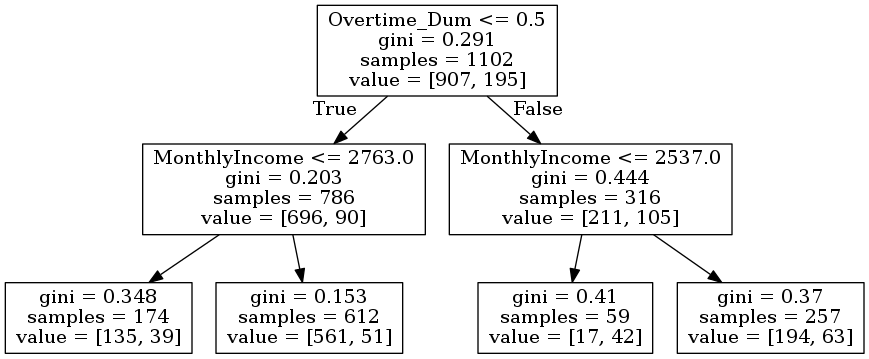

In [18]:
display(Image('Churn_Decision_Tree.png'))

** List out decision tree predictor features and their respective importances. **

In [19]:
pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_}).sort_values('importance', ascending=False)

,feature,importance
4,MonthlyIncome,0.551401
9,Overtime_Dum,0.448599
0,Age,0.000000
1,DistanceFromHome,0.000000
2,EnvironmentSatisfaction,0.000000
3,JobInvolvement,0.000000
5,StockOptionLevel,0.000000
6,Sales_Rep,0.000000
7,Single,0.000000
8,BusTravLevel,0.000000


** Print confusion matrix to calculate accuracy and error rates plus precision and recall. **

In [20]:
print(metrics.confusion_matrix(y_test, y_pred))

[[320   6]
 [ 35   7]]


** Calculate accuracy rate. **

In [21]:
float(320 + 7) / float(320 + 6 + 35 + 7)

0.8885869565217391

** Calculate misclassification / error rate. **

In [22]:
float(35 + 6) / float(320 + 6 + 35 + 7)

0.11141304347826086

** Calculate precision to measure how confident the decision tree model is for capturing the positives. **

In [23]:
float(7) / float(6 + 7)

0.5384615384615384

** Calculate recall / sensitivity to measure how well the decision tree model is capturing the positives. **

In [24]:
float(7) / float(35 + 7)

0.16666666666666666

** Calculate specificity to measure how well the decision tree model is capturing the negatives. **

In [25]:
float(320) / float(320 + 6)

0.9815950920245399

** List out false positives in test data set. **

In [26]:
X_test[y_test < y_pred]

,Age,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,MonthlyIncome,StockOptionLevel,Sales_Rep,Single,BusTravLevel,Overtime_Dum
1402,31,2,3,0,1129,3,0,0,1,1
1028,41,5,1,3,2127,0,0,0,1,1
925,42,7,1,3,2372,0,0,0,1,1
889,27,14,0,2,2235,2,0,0,1,1
1087,34,7,1,2,2308,1,1,0,1,1
632,42,2,1,2,2515,0,0,1,2,1


** List out false negatives in test data set. **

In [27]:
X_test[y_test > y_pred]

,Age,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,MonthlyIncome,StockOptionLevel,Sales_Rep,Single,BusTravLevel,Overtime_Dum
1223,47,9,2,0,12936,0,0,0,2,0
469,32,11,3,3,4707,0,0,0,0,0
264,28,2,0,2,3485,0,0,1,1,0
182,41,20,1,2,3140,0,1,1,1,1
1438,23,9,3,2,1790,1,1,0,2,0
849,43,9,0,0,5346,0,0,1,1,0
50,48,1,0,1,5381,0,0,1,1,1
1167,35,15,0,0,5440,2,0,0,1,1
568,55,2,3,2,19859,1,0,0,1,1
1379,27,22,0,1,2863,0,0,0,2,0
